In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from pyplink import PyPlink
import pickle
%matplotlib inline

In [2]:
plink_f = '../data/sim_1000G_chr10'
pheno_f = '../data/sim_1000G_chr10.txt'

In [3]:
pheno = pd.read_table(pheno_f)
print(pheno.head())
n_subjects = pheno.shape[0]
sub_id = pheno.IID.values
print('Number of subjects:', n_subjects)
inlucde = np.zeros((n_subjects, 1), dtype=bool)
train_dev = pickle.load(open('../training_testingdivition.pickle', 'rb'))
train_dev

   FID      IID  PAT  MAT  SEX  V6        V1        V2        V3        V4
0    0  HG00096    0    0    0  -9  1.391821  1.138268  2.070238 -0.372672
1    0  HG00097    0    0    0  -9 -1.187275  2.092036  0.692091  0.048933
2    0  HG00099    0    0    0  -9  0.133182  0.638893 -0.529870 -1.335510
3    0  HG00100    0    0    0  -9 -1.170558  1.796703  1.220772 -1.487219
4    0  HG00101    0    0    0  -9  1.556918  1.210081 -1.837264 -0.456114
Number of subjects: 2504


(['data/sample_major_1kg/sample_major_14.npy',
  'data/sample_major_1kg/sample_major_6.npy',
  'data/sample_major_1kg/sample_major_20.npy',
  'data/sample_major_1kg/sample_major_4.npy',
  'data/sample_major_1kg/sample_major_13.npy',
  'data/sample_major_1kg/sample_major_12.npy',
  'data/sample_major_1kg/sample_major_21.npy',
  'data/sample_major_1kg/sample_major_0.npy',
  'data/sample_major_1kg/sample_major_7.npy',
  'data/sample_major_1kg/sample_major_15.npy',
  'data/sample_major_1kg/sample_major_5.npy',
  'data/sample_major_1kg/sample_major_17.npy',
  'data/sample_major_1kg/sample_major_24.npy',
  'data/sample_major_1kg/sample_major_1.npy',
  'data/sample_major_1kg/sample_major_23.npy',
  'data/sample_major_1kg/sample_major_3.npy',
  'data/sample_major_1kg/sample_major_11.npy',
  'data/sample_major_1kg/sample_major_2.npy',
  'data/sample_major_1kg/sample_major_16.npy',
  'data/sample_major_1kg/sample_major_9.npy'],
 ['data/sample_major_1kg/sample_major_19.npy',
  'data/sample_major_

In [4]:
train = train_dev[0]
include = list()
for t in train:
    dat = np.load('../'+t)
    include.append(sub_id[dat[1]])

In [5]:
subjects_train = np.array(include).flatten()

In [6]:
to_file = pd.DataFrame({'fid': np.zeros(len(subjects_train), dtype=int), 'iid': subjects_train})
print(to_file.head())
to_file.to_csv('training.fam', header=False, index=False, sep=' ')

   fid      iid
0    0  HG03705
1    0  HG03706
2    0  HG03708
3    0  HG03709
4    0  HG03711


In [57]:
%%bash
plink='../wepredict/bin/plink'
f='../data/sim_1000G_chr10'
pheno='../data/sim_1000G_chr10.txt'
training='training.fam'

#GWAS
$plink --bfile $f \
--keep $training \
--pheno $pheno \
--pheno-name V1 \
--allow-no-sex \
--linear hide-covar \
--out 1kg

# clumping
$plink --bfile $f \
--clump 1kg.assoc.linear \
--clump-p1 0.001 \
--clump-p2 0.01 \
--clump-r2 0.2 \
--out 1kgV1

PLINK v1.90b6.4 64-bit (7 Aug 2018)            www.cog-genomics.org/plink/1.9/
(C) 2005-2018 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to 1kg.log.
Options in effect:
  --allow-no-sex
  --bfile ../data/sim_1000G_chr10
  --keep training.fam
  --linear hide-covar
  --out 1kg
  --pheno ../data/sim_1000G_chr10.txt
  --pheno-name V1

15844 MB RAM detected; reserving 7922 MB for main workspace.
405378 variants loaded from .bim file.
2504 people (0 males, 0 females, 2504 ambiguous) loaded from .fam.
Ambiguous sex IDs written to 1kg.nosex .
2504 phenotype values present after --pheno.
--keep: 2000 people remaining.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 2000 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%28%29%30%31%32%33%34%35%

In [7]:
clumped = pd.read_table('1kgV1.clumped', sep=r'\s*')

/home/robert/software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/home/robert/software/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py:2230: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/home/robert/software/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py:2232: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


In [8]:
clumped.head()

,CHR,F,SNP,BP,P,TOTAL,NSIG,S05,S01,S001,S0001,SP2
0,10,1,10:44113870:A:G,44113870,0.000022,2,0,0,0,1,1,"10:44103616:T:C(1),10:44110144:C:T(1)"
1,10,1,10:106009034:C:A,106009034,0.000026,8,0,0,1,3,4,"10:106004999:G:A(1),10:106005280:T:C(1),10:106..."
2,10,1,10:65824079:T:C,65824079,0.000031,124,70,36,17,1,0,"10:65795326:A:G(1),10:65803263:C:T(1),10:65806..."
3,10,1,10:29298712:C:CAGAG,29298712,0.000033,26,0,3,5,18,0,"10:29278676:C:T(1),10:29278710:C:G(1),10:29282..."
4,10,1,10:134974187:A:T,134974187,0.000045,100,39,23,21,16,1,"10:134942166:A:G(1),10:134952693:T:G(1),10:134..."


In [9]:
clumped_snps = clumped.SNP.values

In [10]:
def load_genotypes(plink: str, snps: list, subjects: list):
    reader = PyPlink(plink)
    n = sum(subjects)
    p = len(snps)
    genotype_matrix = np.zeros((n, len(snps)))
    u = 0
    for snp, genotypes in reader.iter_geno_marker(snps):
        genotype_matrix[:, u] = genotypes[subjects]
        u += 1
    return genotype_matrix

In [11]:
bool_training = [k in subjects_train for k in sub_id]
bool_test = [k not in subjects_train for k in sub_id]

In [12]:
X_train = load_genotypes(plink_f, clumped_snps, bool_training)
X_valid = load_genotypes(plink_f, clumped_snps, bool_test)
Y_train = pheno.V1.values[bool_training]
Y_valid = pheno.V1.values[bool_test]

In [13]:
from sklearn.linear_model import Lasso, LinearRegression

In [14]:
lassoModel = Lasso(normalize=False, copy_X=False, alpha=0.05)

In [15]:
lassoModel.fit(X_train, Y_train)

Lasso(alpha=0.05, copy_X=False, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [16]:
lassoModel.score(X_valid, Y_valid)

-0.0017910321826553055

In [17]:
lassoModel.score(X_train, Y_train)

0.024752088922696314

In [18]:
lassoModel.coef_

array([ 0.        ,  0.        , -0.00364262, -0.02733969,  0.02461121,
       -0.        , -0.        , -0.02341318,  0.02020677, -0.01436828,
       -0.        ,  0.01983007, -0.01463685, -0.        , -0.        ,
       -0.        , -0.        ,  0.0015301 , -0.        ,  0.01099492,
        0.01038083,  0.        ,  0.        ,  0.00993607, -0.        ,
       -0.        ,  0.        , -0.        , -0.01220388, -0.        ,
       -0.        ,  0.00383964,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.00486384, -0.        ,
       -0.        ,  0.00342201, -0.        ,  0.        ,  0.        ,
       -0.00809595, -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.00568296, -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.        ,  0.00583119,
        0.        , -0.        , -0.        , -0.        ,  0.  

In [184]:
linearModel = LinearRegression()
linearModel.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [185]:
linearModel.score(X_valid, Y_valid)

-0.1903891761184464

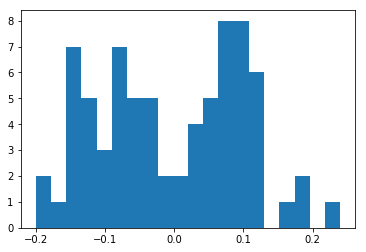

In [21]:
l, h, h = plt.hist(linearModel.coef_, 20)

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import metrics
from keras import regularizers
from keras import optimizers

/home/robert/software/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [34]:
Y = pheno.V1.values
X = load_genotypes(plink_f, clumped_snps, np.ones(len(Y), dtype=bool))
X.shape

(2504, 74)

In [116]:
from keras import backend as K
import tensorflow as tf
def correlation_coefficient_loss(y_true, y_pred):
    x = y_true
    y = y_pred
    mx = K.mean(x)
    my = K.mean(y)
    xm, ym = x-mx, y-my
    r_num = K.sum(tf.multiply(xm,ym))
    r_den = K.sqrt(tf.multiply(K.sum(K.square(xm)), K.sum(K.square(ym))))
    r = r_num / r_den

    r = K.maximum(K.minimum(r, 1.0), -1.0)
    return K.square(r)

In [172]:
model = Sequential()

In [173]:
model.add(Dense(units=60, activation='relu', input_dim=74, kernel_regularizer=regularizers.l1(0.01)))
model.add(Dropout(0.2))
model.add(Dense(units=60, activation='relu', kernel_regularizer=regularizers.l1(0.01)))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='linear', kernel_regularizer=regularizers.l1(0.01)))

In [174]:
opti = optimizers.Adagrad(lr=0.01)
model.compile(loss='mse', optimizer=opti, metrics=[correlation_coefficient_loss], )

In [175]:
history = model.fit(X, Y, epochs=100, verbose=0, validation_split=0.2, batch_size=200)

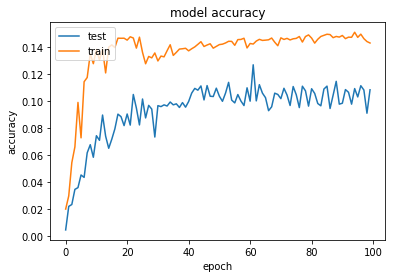

In [189]:
# summarize history for accuracy
plt.plot(history.history['correlation_coefficient_loss'])
plt.plot(history.history['val_correlation_coefficient_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['test', 'train'], loc='upper left')
plt.savefig('keras_model.png')
plt.show()

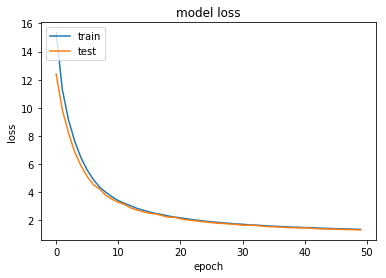

In [145]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [186]:
model.evaluate(X_valid, Y_valid)

504/504 [==============================] - 1s 1ms/step


[1.4238999306209503, 0.03328426722815955]

In [187]:
y_pred = model.predict(X_valid)

In [188]:
np.corrcoef(y_pred.flatten(), Y_valid)

array([[1.        , 0.08212745],
       [0.08212745, 1.        ]])

In [31]:
from keras.utils import plot_model

In [181]:
plot_model(model, to_file='keras_model.png')

In [182]:
from IPython.display import Image

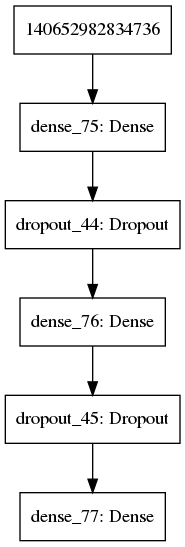

In [183]:
Image('keras_model_strcuture.png')